In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import pandas as pd
from numba import jit
from functools import partial
from scipy.stats import pearsonr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


In [11]:
@jit(nogil=True)
def pr_cor_corr(x, y):
    """
    Uses the scipy stats module to calculate a pearson correlation test
    :x vector: Input pixel vector to run tests on
    :y vector: The date input vector 
    """
    # Check NA values
    co = np.count_nonzero(~np.isnan(x))
    if co < len(y): # If fewer than length of y observations return np.nan
        print('I am here')
        return np.nan, np.nan   
    
    corr, _ = pearsonr(x, y)
    return corr

@jit(nogil=True)
def pr_cor_pval(x, y):
    """
    Uses the scipy stats module to calculate a pearson correlation test
    :x vector: Input pixel vector to run tests on
    :y vector: The date input vector 
    """
    # Check NA values
    co = np.count_nonzero(~np.isnan(x))
    if co < len(y): # If fewer than length of y observations return np.nan
        return np.nan
    # Run the pearson correlation test
    _, p_value = pearsonr(x, y)
    return p_value   

# The function we are going to use for applying our pearson test per pixel
def pearsonr_corr(x, y, func=pr_cor_corr, dim='time'):
    # x = Pixel value, y = a vector containing the date, dim == dimension
    return xr.apply_ufunc(
        func, x , y,
        input_core_dims=[[dim], [dim]],        
        vectorize=True,   
        output_dtypes=[float]
    )

In [41]:
import matplotlib
matplotlib.rc('figure', figsize = (10, 5))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = True, right = True)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

In [152]:
#Location of different GCM historical simulations
filslp = "C:/Users/blaze/Documents/mywork/prmsl.mon.mean.nc"
filcsiro = "C:/Users/blaze/Documents/mywork/gcm_historical/axel_blaze_pr_WAS-44_CSIRO-QCCCE-CSIRO-Mk3-6-0_RegCM4-4_historical_mon_37N-98E_8N-68E_19510116-20051216.nc"
filcanesm = "C:/Users/blaze/Documents/mywork/gcm_historical/axel_blaze_pr_WAS-44_CCCma-CanESM2_RegCM4-4_historical_mon_37N-98E_8N-68E_19510116-20051216.nc"
filgfdl = "C:/Users/blaze/Documents/mywork/gcm_historical/axel_blaze_pr_WAS-44_NOAA-GFDL-GFDL-ESM2M_RegCM4-4_historical_mon_37N-98E_8N-68E_19510116-20051216.nc"
filmpi = "C:/Users/blaze/Documents/mywork/gcm_historical/axel_blaze_pr_WAS-44_MPI-M-MPI-ESM-MR_RegCM4-4_historical_mon_37N-98E_8N-68E_19510116-20051216.nc"
filcnrm = "C:/Users/blaze/Documents/mywork/gcm_historical/axel_blaze_pr_WAS-44_CNRM-CERFACS-CNRM-CM5_RegCM4-4_historical_mon_37N-98E_8.N-68E_19510116-20051216.nc"

In [131]:
#Converting MIROC5 daily data into monthly data
df = xr.open_dataset('C:/Users/blaze/Documents/mywork/miroc5_daily/pr_day_MIROC5_historical_r1i1p1_1951.nc')
ds_miroc5 = df.resample(time='1M').mean()

a='C:/Users/blaze/Documents/mywork/miroc5_daily/pr_day_MIROC5_historical_r1i1p1_'
b='.nc'

for i in range(1952,2006):
    ncfile = a+str(i)+b
    ds = xr.open_dataset(ncfile)
    monthly_temp = ds.resample(time='1M').mean()
    ds_miroc5 = xr.concat([ds_miroc5,monthly_temp], dim='time')

In [154]:
#Converting MIROC-ESM-CHEM daily data into monthly data
df = xr.open_dataset('C:/Users/blaze/Documents/mywork/miroc_esm_chem/pr_day_MIROC-ESM-CHEM_historical_r1i1p1_1951.nc')
ds_miroc_esm_chem = df.resample(time='1M').mean()

a='C:/Users/blaze/Documents/mywork/miroc_esm_chem/pr_day_MIROC-ESM-CHEM_historical_r1i1p1_'
b='.nc'

for i in range(1952,2006):
    ncfile = a+str(i)+b
    ds = xr.open_dataset(ncfile)
    monthly_temp = ds.resample(time='1M').mean()
    ds_miroc_esm_chem = xr.concat([ds_miroc_esm_chem,monthly_temp], dim='time')

In [155]:
#Converting MIROC-ESM daily data into monthly data
df = xr.open_dataset('C:/Users/blaze/Documents/mywork/miroc_esm/pr_day_MIROC-ESM_historical_r1i1p1_1951.nc')
ds_miroc_esm = df.resample(time='1M').mean()

a='C:/Users/blaze/Documents/mywork/miroc_esm/pr_day_MIROC-ESM_historical_r1i1p1_'
b='.nc'

for i in range(1952,2006):
    ncfile = a+str(i)+b
    ds = xr.open_dataset(ncfile)
    monthly_temp = ds.resample(time='1M').mean()
    ds_miroc_esm = xr.concat([ds_miroc_esm,monthly_temp], dim='time')

In [156]:
#Converting GFDL-CM3 daily data into monthly data
df = xr.open_dataset('C:/Users/blaze/Documents/mywork/gfdl_cm3/pr_day_GFDL-CM3_historical_r1i1p1_1951.nc')
ds_gfdl_cm3 = df.resample(time='1M').mean()

a='C:/Users/blaze/Documents/mywork/gfdl_cm3/pr_day_GFDL-CM3_historical_r1i1p1_'
b='.nc'

for i in range(1952,2006):
    ncfile = a+str(i)+b
    ds = xr.open_dataset(ncfile)
    monthly_temp = ds.resample(time='1M').mean()
    ds_gfdl_cm3 = xr.concat([ds_gfdl_cm3,monthly_temp], dim='time')

In [136]:
ds_miroc5

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 200, time: 660)
Coordinates:
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 39.375 39.625 39.875
  * lon      (lon) float32 60.125 60.375 60.625 ... 109.375 109.625 109.875
  * time     (time) object 1951-01-31 00:00:00 ... 2005-12-31 00:00:00
Data variables:
    pr       (time, lat, lon) float32 2.510801e-05 2.5814837e-05 ... 0.0 0.0

In [133]:
yrStrt  = 1951        # manually specify for convenience
yrLast  = 2005          # 20th century ends 2018  

clStrt  = 1950          # reference climatology for SOI
clLast  = 1979          

yrStrtP = 1979          # 1st year GPCP
yrLastP = yrLast        # match 20th century

In [134]:
latT = -17.6         # Tahiti
lonT = 210.75  
latD = -12.5         # Darwin 
lonD = 130.83  

In [107]:
# read slp data
ds_slp = xr.open_dataset(filslp).sel(time=slice(str(yrStrt)+'-01-01', str(yrLast)+'-12-31'))

# select grids of T and D
T    = ds_slp.sel(lat=latT, lon=lonT, method='nearest')
D    = ds_slp.sel(lat=latD, lon=lonD, method='nearest')

# monthly reference climatologies
TClm = T.sel(time=slice(str(clStrt)+'-01-01', str(clLast)+'-12-31'))     
DClm = D.sel(time=slice(str(clStrt)+'-01-01', str(clLast)+'-12-31'))

# anomalies reference clim
TAnom = T.groupby('time.month') - TClm.groupby('time.month').mean('time')
DAnom = D.groupby('time.month') - DClm.groupby('time.month').mean('time')

# stddev of anomalies over clStrt & clLast
TAnomStd   = np.std(TAnom.sel(time=slice(str(clStrt)+'-01-01', str(clLast)+'-12-31'))) 
DAnomStd   = np.std(DAnom.sel(time=slice(str(clStrt)+'-01-01', str(clLast)+'-12-31')))

# signal and noise
soi_signal = ((TAnom/TAnomStd) - (DAnom/DAnomStd)) 

In [108]:
soi_signal = soi_signal.rename({'prmsl':'SOI'})

In [109]:
soi_signal.SOI

<xarray.DataArray 'SOI' (time: 660)>
array([ 3.360834,  0.904245, -1.578465, ...,  1.741049, -0.388018, -0.042   ])
Coordinates:
  * time     (time) datetime64[ns] 1951-01-01 1951-02-01 ... 2005-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [158]:
ds_csiro   = xr.open_dataset(filcsiro).sel(time=slice(str(yrStrt)+'-01-01', str(yrLast)+'-12-31'))
ds_canesm  = xr.open_dataset(filcanesm).sel(time=slice(str(yrStrt)+'-01-01', str(yrLast)+'-12-31'))
ds_gfdl    = xr.open_dataset(filgfdl).sel(time=slice(str(yrStrt)+'-01-01', str(yrLast)+'-12-31'))
ds_mpi     = xr.open_dataset(filmpi).sel(time=slice(str(yrStrt)+'-01-01', str(yrLast)+'-12-31'))
ds_cnrm    = xr.open_dataset(filcnrm).sel(time=slice(str(yrStrt)+'-01-01', str(yrLast)+'-12-31'))

In [111]:
soi_prc  = soi_signal.sel(time=slice(str(yrStrt)+'-01-01', str(yrLast)+'-12-31'))

In [112]:
soi_prc

<xarray.Dataset>
Dimensions:    (nbnds: 2, time: 660)
Coordinates:
  * time       (time) datetime64[ns] 1951-01-01 1951-02-01 ... 2005-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SOI        (time) float64 3.361 0.9042 -1.578 ... 1.741 -0.388 -0.042

In [113]:
ds_csiro

<xarray.Dataset>
Dimensions:    (bounds2: 2, time: 660, x: 56, y: 71)
Coordinates:
  * time       (time) object 1951-01-16 12:00:00 ... 2005-12-16 12:00:00
  * y          (y) float64 -9e+05 -8.5e+05 -8e+05 ... 2.5e+06 2.55e+06 2.6e+06
  * x          (x) float64 -1.5e+05 -1e+05 -5e+04 ... 2.5e+06 2.55e+06 2.6e+06
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
Dimensions without coordinates: bounds2
Data variables:
    time_bnds  (time, bounds2) object ...
    pr         (time, y, x) float32 ...
Attributes:
    Conventions:                     CF-1.5
    driving_experiment:              CSIRO-QCCCE-CSIRO-Mk3-6-0, historical, r...
    DODS_EXTRA.Unlimited_Dimension:  time
    creation_date:                   2016-01-28-T13:13:15Z
    frequency:                       mon
    references:                      http://gforge.ictp.it/gf/project/regcm
    driving_experiment_name:         historical
    DODS.strlen:                     0
    experiment:                      h

In [160]:
csiro = xr.DataArray(ds_csiro.pr, coords=[soi_prc.time, ds_csiro.y, ds_csiro.x], dims=['time', 'y','x'])
canesm = xr.DataArray(ds_canesm.pr, coords=[soi_prc.time, ds_canesm.y, ds_canesm.x], dims=['time', 'y','x'])
gfdl = xr.DataArray(ds_gfdl.pr, coords=[soi_prc.time, ds_gfdl.y, ds_gfdl.x], dims=['time', 'y','x'])
cnrm = xr.DataArray(ds_cnrm.pr, coords=[soi_prc.time, ds_cnrm.y, ds_cnrm.x], dims=['time', 'y','x'])
mpi = xr.DataArray(ds_mpi.pr, coords=[soi_prc.time, ds_mpi.y, ds_mpi.x], dims=['time', 'y','x'])
miroc5 = xr.DataArray(ds_miroc5.pr, coords=[soi_prc.time, ds_miroc5.lat, ds_miroc5.lon], dims=['time', 'y','x'])
miroc_esm_chem = xr.DataArray(ds_miroc_esm_chem.pr, coords=[soi_prc.time, ds_miroc_esm_chem.lat, ds_miroc_esm_chem.lon], dims=['time', 'y','x'])
miroc_esm = xr.DataArray(ds_miroc_esm.pr, coords=[soi_prc.time, ds_miroc_esm.lat, ds_miroc_esm.lon], dims=['time', 'y','x'])
gfdl_cm3 = xr.DataArray(ds_gfdl_cm3.pr, coords=[soi_prc.time, ds_gfdl_cm3.lat, ds_gfdl_cm3.lon], dims=['time', 'y','x'])

In [162]:
da_csiro   = csiro.stack(point=('y', 'x'))
da_canesm  = canesm.stack(point=('y', 'x'))
da_gfdl    = gfdl.stack(point=('y', 'x'))
da_mpi   = mpi.stack(point=('y', 'x'))
da_cnrm    = cnrm.stack(point=('y', 'x'))
da_miroc5   = miroc5.stack(point=('y', 'x'))
da_miroc_esm_chem    = miroc_esm_chem.stack(point=('y', 'x'))
da_miroc_esm   = miroc_esm.stack(point=('y', 'x'))
da_gfdl_cm3   = gfdl_cm3.stack(point=('y', 'x'))

In [163]:
corr_csiro = pearsonr_corr(csiro, soi_prc.SOI)
corr_canesm = pearsonr_corr(canesm, soi_prc.SOI)
corr_gfdl = pearsonr_corr(gfdl, soi_prc.SOI)
corr_miroc5 =  pearsonr_corr(miroc5, soi_prc.SOI)
corr_mpi =  pearsonr_corr(mpi, soi_prc.SOI)
corr_miroc_esm_chem =  pearsonr_corr(miroc_esm_chem, soi_prc.SOI)
corr_miroc_esm =  pearsonr_corr(miroc_esm, soi_prc.SOI)
corr_cnrm =  pearsonr_corr(cnrm, soi_prc.SOI)
corr_gfdl_cm3 =  pearsonr_corr(gfdl_cm3, soi_prc.SOI)

In [117]:
corr_csiro

<xarray.DataArray (y: 71, x: 56)>
array([[ 0.055295,  0.049791,  0.043536, ...,  0.090448,  0.085687,  0.08741 ],
       [ 0.056983,  0.056148,  0.053544, ...,  0.087993,  0.089992,  0.094705],
       [ 0.06344 ,  0.066437,  0.064877, ...,  0.085396,  0.088115,  0.089076],
       ...,
       [-0.032706, -0.036153, -0.033441, ..., -0.090513, -0.041332, -0.014788],
       [-0.029113, -0.028319, -0.02999 , ..., -0.071582, -0.031936, -0.032502],
       [-0.029534, -0.028535, -0.028572, ..., -0.068354, -0.039617, -0.027065]])
Coordinates:
  * y        (y) float64 -9e+05 -8.5e+05 -8e+05 ... 2.5e+06 2.55e+06 2.6e+06
  * x        (x) float64 -1.5e+05 -1e+05 -5e+04 0.0 ... 2.5e+06 2.55e+06 2.6e+06

In [164]:
pval_csiro = pearsonr_corr(csiro, soi_prc.SOI, func= pr_cor_pval)
pval_canesm = pearsonr_corr(canesm, soi_prc.SOI, func= pr_cor_pval)
pval_gfdl = pearsonr_corr(gfdl, soi_prc.SOI, func= pr_cor_pval)
pval_miroc5 = pearsonr_corr(miroc5, soi_prc.SOI, func= pr_cor_pval)
pval_miroc_esm_chem = pearsonr_corr(miroc_esm_chem, soi_prc.SOI, func= pr_cor_pval)
pval_miroc_esm = pearsonr_corr(miroc_esm, soi_prc.SOI, func= pr_cor_pval)
pval_mpi = pearsonr_corr(mpi, soi_prc.SOI, func= pr_cor_pval)
pval_cnrm = pearsonr_corr(cnrm, soi_prc.SOI, func= pr_cor_pval)
pval_gfdl_cm3 = pearsonr_corr(gfdl_cm3, soi_prc.SOI, func= pr_cor_pval)

In [119]:
pval_csiro

<xarray.DataArray (y: 71, x: 56)>
array([[0.155911, 0.201418, 0.264045, ..., 0.020125, 0.02772 , 0.024726],
       [0.14365 , 0.14962 , 0.169461, ..., 0.02378 , 0.020764, 0.014938],
       [0.103451, 0.088111, 0.095848, ..., 0.028256, 0.023585, 0.022102],
       ...,
       [0.401546, 0.353762, 0.391049, ..., 0.020035, 0.289012, 0.704528],
       [0.455266, 0.467664, 0.441799, ..., 0.066085, 0.412722, 0.404493],
       [0.448764, 0.464269, 0.463688, ..., 0.079301, 0.309508, 0.487609]])
Coordinates:
  * y        (y) float64 -9e+05 -8.5e+05 -8e+05 ... 2.5e+06 2.55e+06 2.6e+06
  * x        (x) float64 -1.5e+05 -1e+05 -5e+04 0.0 ... 2.5e+06 2.55e+06 2.6e+06

In [165]:
import cartopy
import cartopy.io.shapereader as shpreader

C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE0266D0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE021048> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE023DB0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE0268E0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Appr

C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE01C468> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE01C570> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE01C410> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE01C048> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Appr

C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE019780> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE019308> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE019E60> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE019518> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Appr

C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE010AF0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE0109E8> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE010468> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x00000222CE010150> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:623: UserWarning: Appr

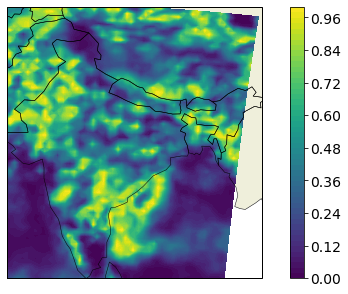

In [42]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=0.5, edgecolor='white')
ax.set_extent([68.7,97.25,8,37.8])

shpf = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')

reader = shpreader.Reader(shpf)
countries = reader.records()


for country in countries:
    ax.add_geometries(country.geometry, crs=ccrs.Geodetic(), facecolor='none', linewidth=0.5, edgecolor='black')

cs = plt.contourf(ds_csiro.lon, ds_csiro.lat,pval_csiro , 50, transform=ccrs.PlateCarree())

cbar = plt.colorbar(cs)

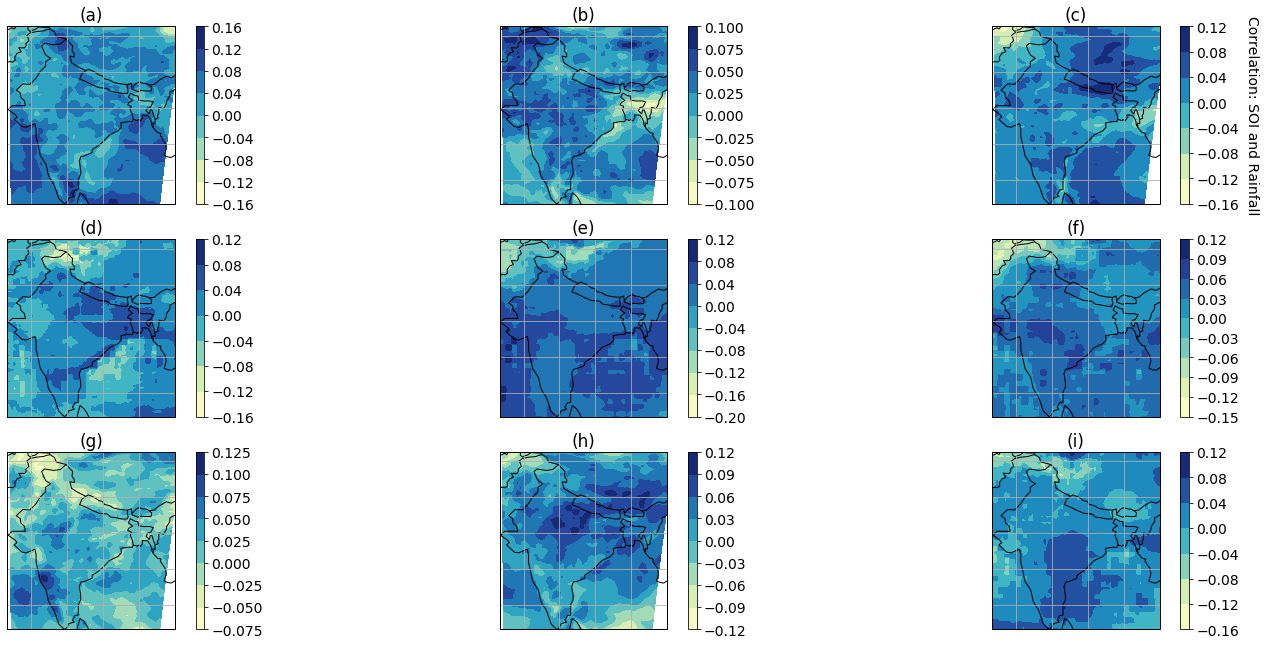

In [174]:
width = 25
height = width/1.666
gs = fig.add_gridspec(4,3)


fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(a)')
ax.add_feature(cfeature.BORDERS)
ax.set_xlabel('CanESM \n This was a long experiment')

cs= ax.contourf(ds_csiro.lon, ds_csiro.lat, corr_csiro, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)


ax = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(b)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_canesm.lon, ds_canesm.lat, corr_canesm, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[0,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(c)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_gfdl.lon, ds_gfdl.lat, corr_gfdl, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)
cbar.ax.set_ylabel(r"Correlation: SOI and Rainfall",rotation =270, labelpad=20, fontsize=14)

ax = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(d)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc5.lon, ds_miroc5.lat, corr_miroc5, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(e)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc_esm.lon, ds_miroc_esm.lat, corr_miroc_esm, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[1,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(f)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc_esm_chem.lon, ds_miroc_esm_chem.lat, corr_miroc_esm_chem, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(g)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_mpi.lon, ds_mpi.lat, corr_mpi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(h)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_cnrm.lon, ds_cnrm.lat, corr_cnrm, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(i)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_gfdl_cm3.lon, ds_gfdl_cm3.lat, corr_gfdl_cm3, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)


plt.show()

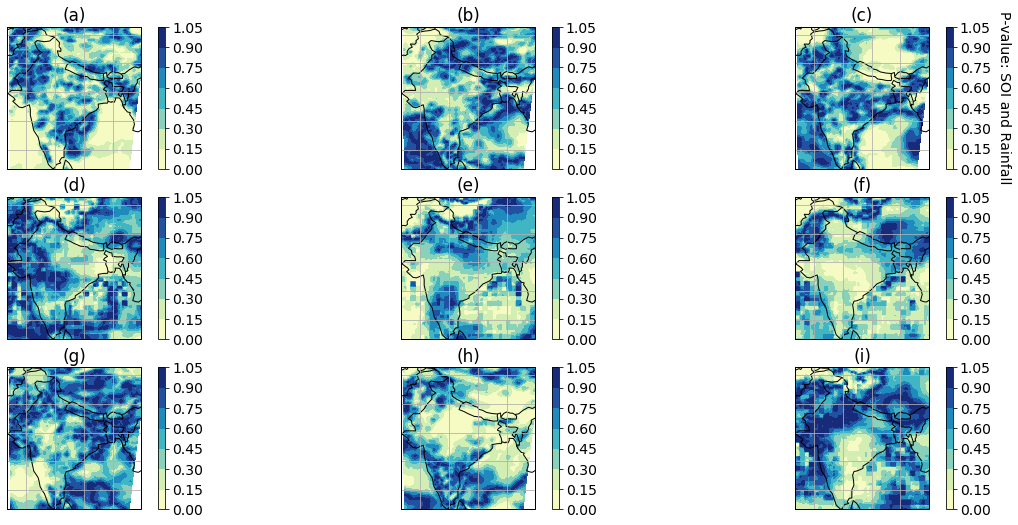

In [173]:
width = 20
height = width/1.666
gs = fig.add_gridspec(4,3)


fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(a)')

ax.add_feature(cfeature.BORDERS)
ax.set_xlabel('CanESM \n This was a long experiment')

cs= ax.contourf(ds_csiro.lon, ds_csiro.lat, pval_csiro, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)


ax = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(b)')

ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_canesm.lon, ds_canesm.lat, pval_canesm, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[0,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(c)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_gfdl.lon, ds_gfdl.lat, pval_gfdl, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)
cbar.ax.set_ylabel(r"P-value: SOI and Rainfall",rotation =270, labelpad=20, fontsize=14)

ax = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(d)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc5.lon, ds_miroc5.lat, pval_miroc5, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(e)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc_esm.lon, ds_miroc_esm.lat, pval_miroc_esm, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[1,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(f)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc_esm_chem.lon, ds_miroc_esm_chem.lat, pval_miroc_esm_chem, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(g)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_mpi.lon, ds_mpi.lat, pval_mpi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(h)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_cnrm.lon, ds_cnrm.lat, pval_cnrm, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(i)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_gfdl_cm3.lon, ds_gfdl_cm3.lat, pval_gfdl_cm3, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)


plt.show()

In [177]:
#loading enso index csv file

In [205]:
import pandas as pd
enso = pd.read_csv("C:/Users/blaze/Documents/enso_51-05.csv")

In [206]:
iod = xr.DataArray(enso.IOD, coords=[soi_prc.time], dims=['time'])
soi = xr.DataArray(enso.SOI, coords=[soi_prc.time], dims=['time'])

In [207]:
#Correlating models and ONI
corr_csiro_iod = pearsonr_corr(csiro, iod)
corr_canesm_iod = pearsonr_corr(canesm, iod)
corr_gfdl_iod = pearsonr_corr(gfdl, iod)
corr_miroc5_iod =  pearsonr_corr(miroc5, iod)
corr_mpi_iod =  pearsonr_corr(mpi, iod)
corr_miroc_esm_chem_iod =  pearsonr_corr(miroc_esm_chem, iod)
corr_miroc_esm_iod =  pearsonr_corr(miroc_esm, iod)
corr_cnrm_iod =  pearsonr_corr(cnrm, iod)
corr_gfdl_cm3_iod =  pearsonr_corr(gfdl_cm3, iod)

In [192]:
#Correlating models and SOI
corr_csiro_soi = pearsonr_corr(csiro, soi)
corr_canesm_soi = pearsonr_corr(canesm, soi)
corr_gfdl_soi = pearsonr_corr(gfdl, soi)
corr_miroc5_soi =  pearsonr_corr(miroc5, soi)
corr_mpi_soi =  pearsonr_corr(mpi, soi)
corr_miroc_esm_chem_soi =  pearsonr_corr(miroc_esm_chem, soi)
corr_miroc_esm_soi =  pearsonr_corr(miroc_esm, soi)
corr_cnrm_soi =  pearsonr_corr(cnrm, soi)
corr_gfdl_cm3_soi =  pearsonr_corr(gfdl_cm3, soi)

In [211]:
#Correlating IOD and SOI
corr_soi_iod = pearsonr(soi,iod)


In [212]:
#Calculating Partial Correlation betwwen SOI and Rainfall
par_csiro_soi = (corr_csiro_soi +corr_soi_iod[1]*corr_csiro_iod)/pow(((1-pow(corr_csiro_soi,2)*(1-pow(corr_csiro_iod,2)))),0.5)
par_canesm_soi = (corr_canesm_soi +corr_soi_iod[1]*corr_canesm_iod)/pow(((1-pow(corr_canesm_soi,2)*(1-pow(corr_canesm_iod,2)))),0.5)
par_gfdl_soi = (corr_gfdl_soi +corr_soi_iod[1]*corr_gfdl_iod)/pow(((1-pow(corr_gfdl_soi,2)*(1-pow(corr_gfdl_iod,2)))),0.5)
par_miroc5_soi = (corr_miroc5_soi +corr_soi_iod[1]*corr_miroc5_iod)/pow(((1-pow(corr_miroc5_soi,2)*(1-pow(corr_miroc5_iod,2)))),0.5)
par_mpi_soi = (corr_mpi_soi +corr_soi_iod[1]*corr_mpi_iod)/pow(((1-pow(corr_mpi_soi,2)*(1-pow(corr_mpi_iod,2)))),0.5)
par_miroc_esm_chem_soi = (corr_miroc_esm_chem_soi +corr_soi_iod[1]*corr_miroc_esm_chem_iod)/pow(((1-pow(corr_miroc_esm_chem_soi,2)*(1-pow(corr_miroc_esm_chem_iod,2)))),0.5)
par_miroc_esm_soi = (corr_miroc_esm_soi +corr_soi_iod[1]*corr_miroc_esm_iod)/pow(((1-pow(corr_miroc_esm_soi,2)*(1-pow(corr_miroc_esm_iod,2)))),0.5)
par_cnrm_soi = (corr_cnrm_soi +corr_soi_iod[1]*corr_cnrm_iod)/pow(((1-pow(corr_cnrm_soi,2)*(1-pow(corr_cnrm_iod,2)))),0.5)
par_gfdl_cm3_soi = (corr_gfdl_cm3_soi +corr_soi_iod[1]*corr_gfdl_cm3_iod)/pow(((1-pow(corr_gfdl_cm3_soi,2)*(1-pow(corr_gfdl_cm3_iod,2)))),0.5)

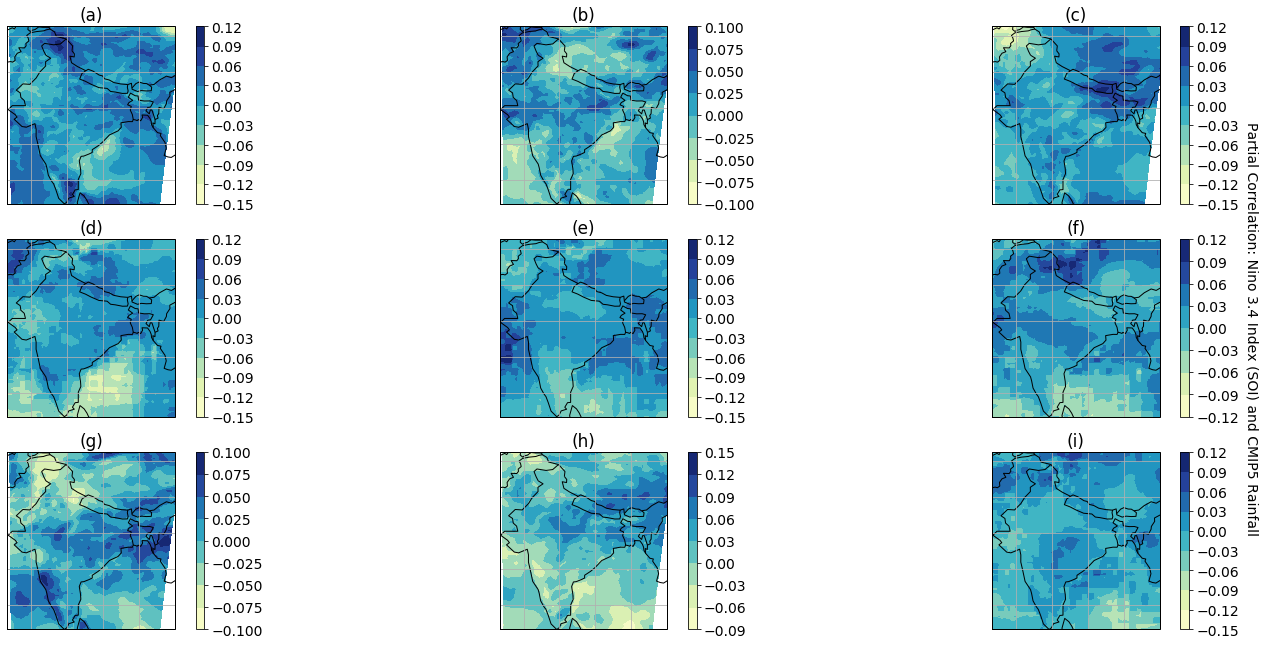

In [214]:
width = 25
height = width/1.666
gs = fig.add_gridspec(4,3)


fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(a)')
ax.add_feature(cfeature.BORDERS)

cs= ax.contourf(ds_csiro.lon, ds_csiro.lat, par_csiro_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)


ax = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(b)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_canesm.lon, ds_canesm.lat, par_canesm_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[0,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(c)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_gfdl.lon, ds_gfdl.lat, par_gfdl_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)


ax = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(d)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc5.lon, ds_miroc5.lat, par_miroc5_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(e)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc_esm.lon, ds_miroc_esm.lat, par_miroc_esm_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[1,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(f)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc_esm_chem.lon, ds_miroc_esm_chem.lat, par_miroc_esm_chem_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(g)')
ax.add_feature(cfeature.BORDERS)
cbar.ax.set_ylabel(r"Partial Correlation: Nino 3.4 Index (SOI) and CMIP5 Rainfall",rotation =270, labelpad=20, fontsize=14)

cs= ax.contourf(ds_mpi.lon, ds_mpi.lat, par_mpi_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(h)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_cnrm.lon, ds_cnrm.lat, par_cnrm_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(i)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_gfdl_cm3.lon, ds_gfdl_cm3.lat, par_gfdl_cm3_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)


plt.show()

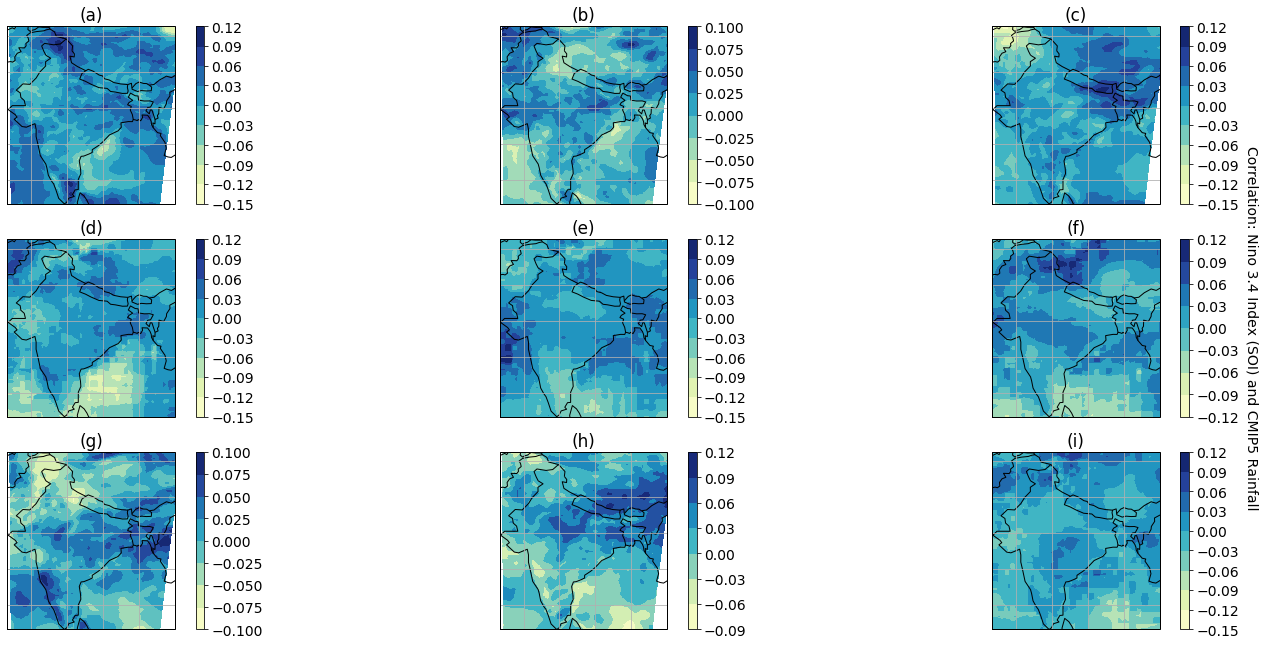

In [195]:
width = 25
height = width/1.666
gs = fig.add_gridspec(4,3)


fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(a)')
ax.add_feature(cfeature.BORDERS)

cs= ax.contourf(ds_csiro.lon, ds_csiro.lat, corr_csiro_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)


ax = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(b)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_canesm.lon, ds_canesm.lat, corr_canesm_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[0,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(c)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_gfdl.lon, ds_gfdl.lat, corr_gfdl_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)


ax = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(d)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc5.lon, ds_miroc5.lat, corr_miroc5_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(e)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc_esm.lon, ds_miroc_esm.lat, corr_miroc_esm_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[1,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(f)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_miroc_esm_chem.lon, ds_miroc_esm_chem.lat, corr_miroc_esm_chem_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,0], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(g)')
ax.add_feature(cfeature.BORDERS)
cbar.ax.set_ylabel(r"Correlation: Nino 3.4 Index (SOI) and CMIP5 Rainfall",rotation =270, labelpad=20, fontsize=14)

cs= ax.contourf(ds_mpi.lon, ds_mpi.lat, corr_mpi_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,1], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(h)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_cnrm.lon, ds_cnrm.lat, corr_cnrm_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)

ax = fig.add_subplot(gs[2,2], projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([68, 96, 8, 37])
ax.set_title('(i)')
ax.add_feature(cfeature.BORDERS)


cs= ax.contourf(ds_gfdl_cm3.lon, ds_gfdl_cm3.lat, corr_gfdl_cm3_soi, transform=ccrs.PlateCarree(), cmap = 'YlGnBu')
cbar= plt.colorbar(cs)


plt.show()

In [196]:
corr_soi_oni = pearsonr(soi,oni)

In [197]:
corr_soi_oni

(-0.7018887490789094, 4.926693171596408e-99)

In [198]:
import math

In [ ]:
par_csiro_soi = (corr_csiro_soi +corr_soi_oni[1]*corr_csiro_oni)/pow(((1-pow(corr_csiro_soi,2)*(1-pow(corr_csiro_oni,2)))),0.5)
par_canesm_soi = (corr_canesm_soi +corr_soi_oni[1]*corr_canesm_oni)/pow(((1-pow(corr_canesm_soi,2)*(1-pow(corr_canesm_oni,2)))),0.5)
par_csiro_soi = (corr_csiro_soi +corr_soi_oni[1]*corr_csiro_oni)/pow(((1-pow(corr_csiro_soi,2)*(1-pow(corr__oni,2)))),0.5)
par_csiro_soi = (corr_csiro_soi +corr_soi_oni[1]*corr_csiro_oni)/pow(((1-pow(corr_csiro_soi,2)*(1-pow(corr_csiro_oni,2)))),0.5)
par_csiro_soi = (corr_csiro_soi +corr_soi_oni[1]*corr_csiro_oni)/pow(((1-pow(corr_csiro_soi,2)*(1-pow(corr_csiro_oni,2)))),0.5)
par_csiro_soi = (corr_csiro_soi +corr_soi_oni[1]*corr_csiro_oni)/pow(((1-pow(corr_csiro_soi,2)*(1-pow(corr_csiro_oni,2)))),0.5)
par_csiro_soi = (corr_csiro_soi +corr_soi_oni[1]*corr_csiro_oni)/pow(((1-pow(corr_csiro_soi,2)*(1-pow(corr_csiro_oni,2)))),0.5)
par_csiro_soi = (corr_csiro_soi +corr_soi_oni[1]*corr_csiro_oni)/pow(((1-pow(corr_csiro_soi,2)*(1-pow(corr_csiro_oni,2)))),0.5)
